# Task 3: Credit approval 

Credit approval is necessary to assess an individual's creditworthiness and determine their eligibility for loans, credit cards, and other financial products. It helps lenders to evaluate the borrower's ability to repay the loan, their credit history, and other financial obligations.
Credit approval is important for both lenders and borrowers because it enables lenders to manage their risk and make informed lending decisions while ensuring that borrowers can obtain financing on fair and reasonable terms.

In many credit approval applications, it is crucial for the model to be interpretable. This means that the model's inner workings and decision-making process can be easily understood and explained by humans. An interpretable model can help to build trust in the model's output, provide transparency in the decision-making process, and enable regulators to monitor and audit the model's performance. 

The task is the following:

- Apply DTs, and RFs to solve a classification problem;
- Evaluate and compare the performance of different models;
- Visualise the models. 


### Data
- `credit.policy`: whether the customer meets the credit underwriting criteria;
- `purpose`: the purpose of the loan;
- `int.rate`: the interest rate of the loan;
- `installment`: the monthly installments owed by the borrower if the loan is funded;
- `log.annual.inc`: the natural logarithm of the self-reported annual income of the borrower;
- `dti`: the debt-to-income ratio of the borrower;
- `fico`: the FICO credit score of the borrower;
- `days.with.cr.line`: the number of days the borrower has had a credit line;
- `revol.bal`: the borrower's revolving balance;
- `revol.util`: the borrower's revolving line utilization rate.

#### Dataset loading

In [ ]:
import pandas as pd
import numpy as np

# load the dataset
data = pd.read_csv('loan_data.csv')
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
# check whether the dataset have missing values
print(f'Number of missing values: {data.isna().sum().sum()}')

Number of missing values: 0


#### Categorical Encoding



In [ ]:
from sklearn.preprocessing import OneHotEncoder


# encode categorical feature with one-hot-encoder
def encoding(df, feat_name, encoder):
    new_cols = pd.DataFrame(encoder.fit_transform(df[feat_name]), 
                    columns=encoder.get_feature_names_out(feat_name))
    new_df = pd.concat([df, new_cols], axis=1)    
    new_df.drop(feat_name, axis=1, inplace=True)
    return new_df


# define one-hot-encoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# encode 'purpose' column in both training and test data
data_enc = encoding(data, ['purpose'], encoder)
data_enc.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# select features from the dataset
X = data_enc.drop(['credit.policy'], axis=1)

# сreate the target 
y = data_enc['credit.policy']

In [ ]:
# check the class balance
y.value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

As can be seen, we are dealing with an imbalanced dataset.

### Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

# split the data into train (80%) and test (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,  
                                                    stratify=y)

### Decision tree

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, balanced_accuracy_score


# calculate and print metrics
def print_metrics(true, pred):
    print(f'Recall: {recall_score(true, pred):.5f}')
    print(f'Precision: {precision_score(true, pred):.5f}')
    print(f'F1: {f1_score(true, pred):.5f}')
    print(f'Balanced accuracy: {balanced_accuracy_score(true, pred):.5f}')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# create the model with no fine-tuning 
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

# evaluate the initial model performance
print_metrics(y_test, y_pred)

Recall: 0.99416
Precision: 0.99159
F1: 0.99288
Balanced accuracy: 0.97970


In [ ]:
# evaluate the initial model performance using classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       374
           1       0.99      0.99      0.99      1542

    accuracy                           0.99      1916
   macro avg       0.98      0.98      0.98      1916
weighted avg       0.99      0.99      0.99      1916



#### Tuning the Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


# tune the decision tree applying grid search
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [None] + list(range(1, 20)),
              'min_samples_split': np.arange(2, 10),
              'min_samples_leaf': np.arange(1, 6), 
              'max_features': [None, 'sqrt', 'log2']
              }

search = GridSearchCV(estimator=DecisionTreeClassifier(), 
                      param_grid=parameters, 
                      scoring=['f1', 'recall', 'precision'], refit='f1', 
                      cv=8, n_jobs=-1)

search.fit(X_train, y_train)

print('Best parameters (CV score=%0.3f):' % 
      search.best_score_, search.best_params_)

Best parameters (CV score=0.995): {'criterion': 'entropy', 'max_depth': 11, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 3}


In [ ]:
# print the best model
print(search.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=3,
                       min_samples_split=3)


In [ ]:
# define the best model
best_dtree = search.best_estimator_

best_dtree.fit(X_train, y_train)
y_pred_dt = best_dtree.predict(X_test)

# evaluate the model performance
print_metrics(y_test, y_pred_dt)

Recall: 0.99481
Precision: 0.99546
F1: 0.99513
Balanced accuracy: 0.98805


In [ ]:
# evaluate the model performance using classification report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       374
           1       1.00      0.99      1.00      1542

    accuracy                           0.99      1916
   macro avg       0.99      0.99      0.99      1916
weighted avg       0.99      0.99      0.99      1916



#### Visualize the Decision Tree

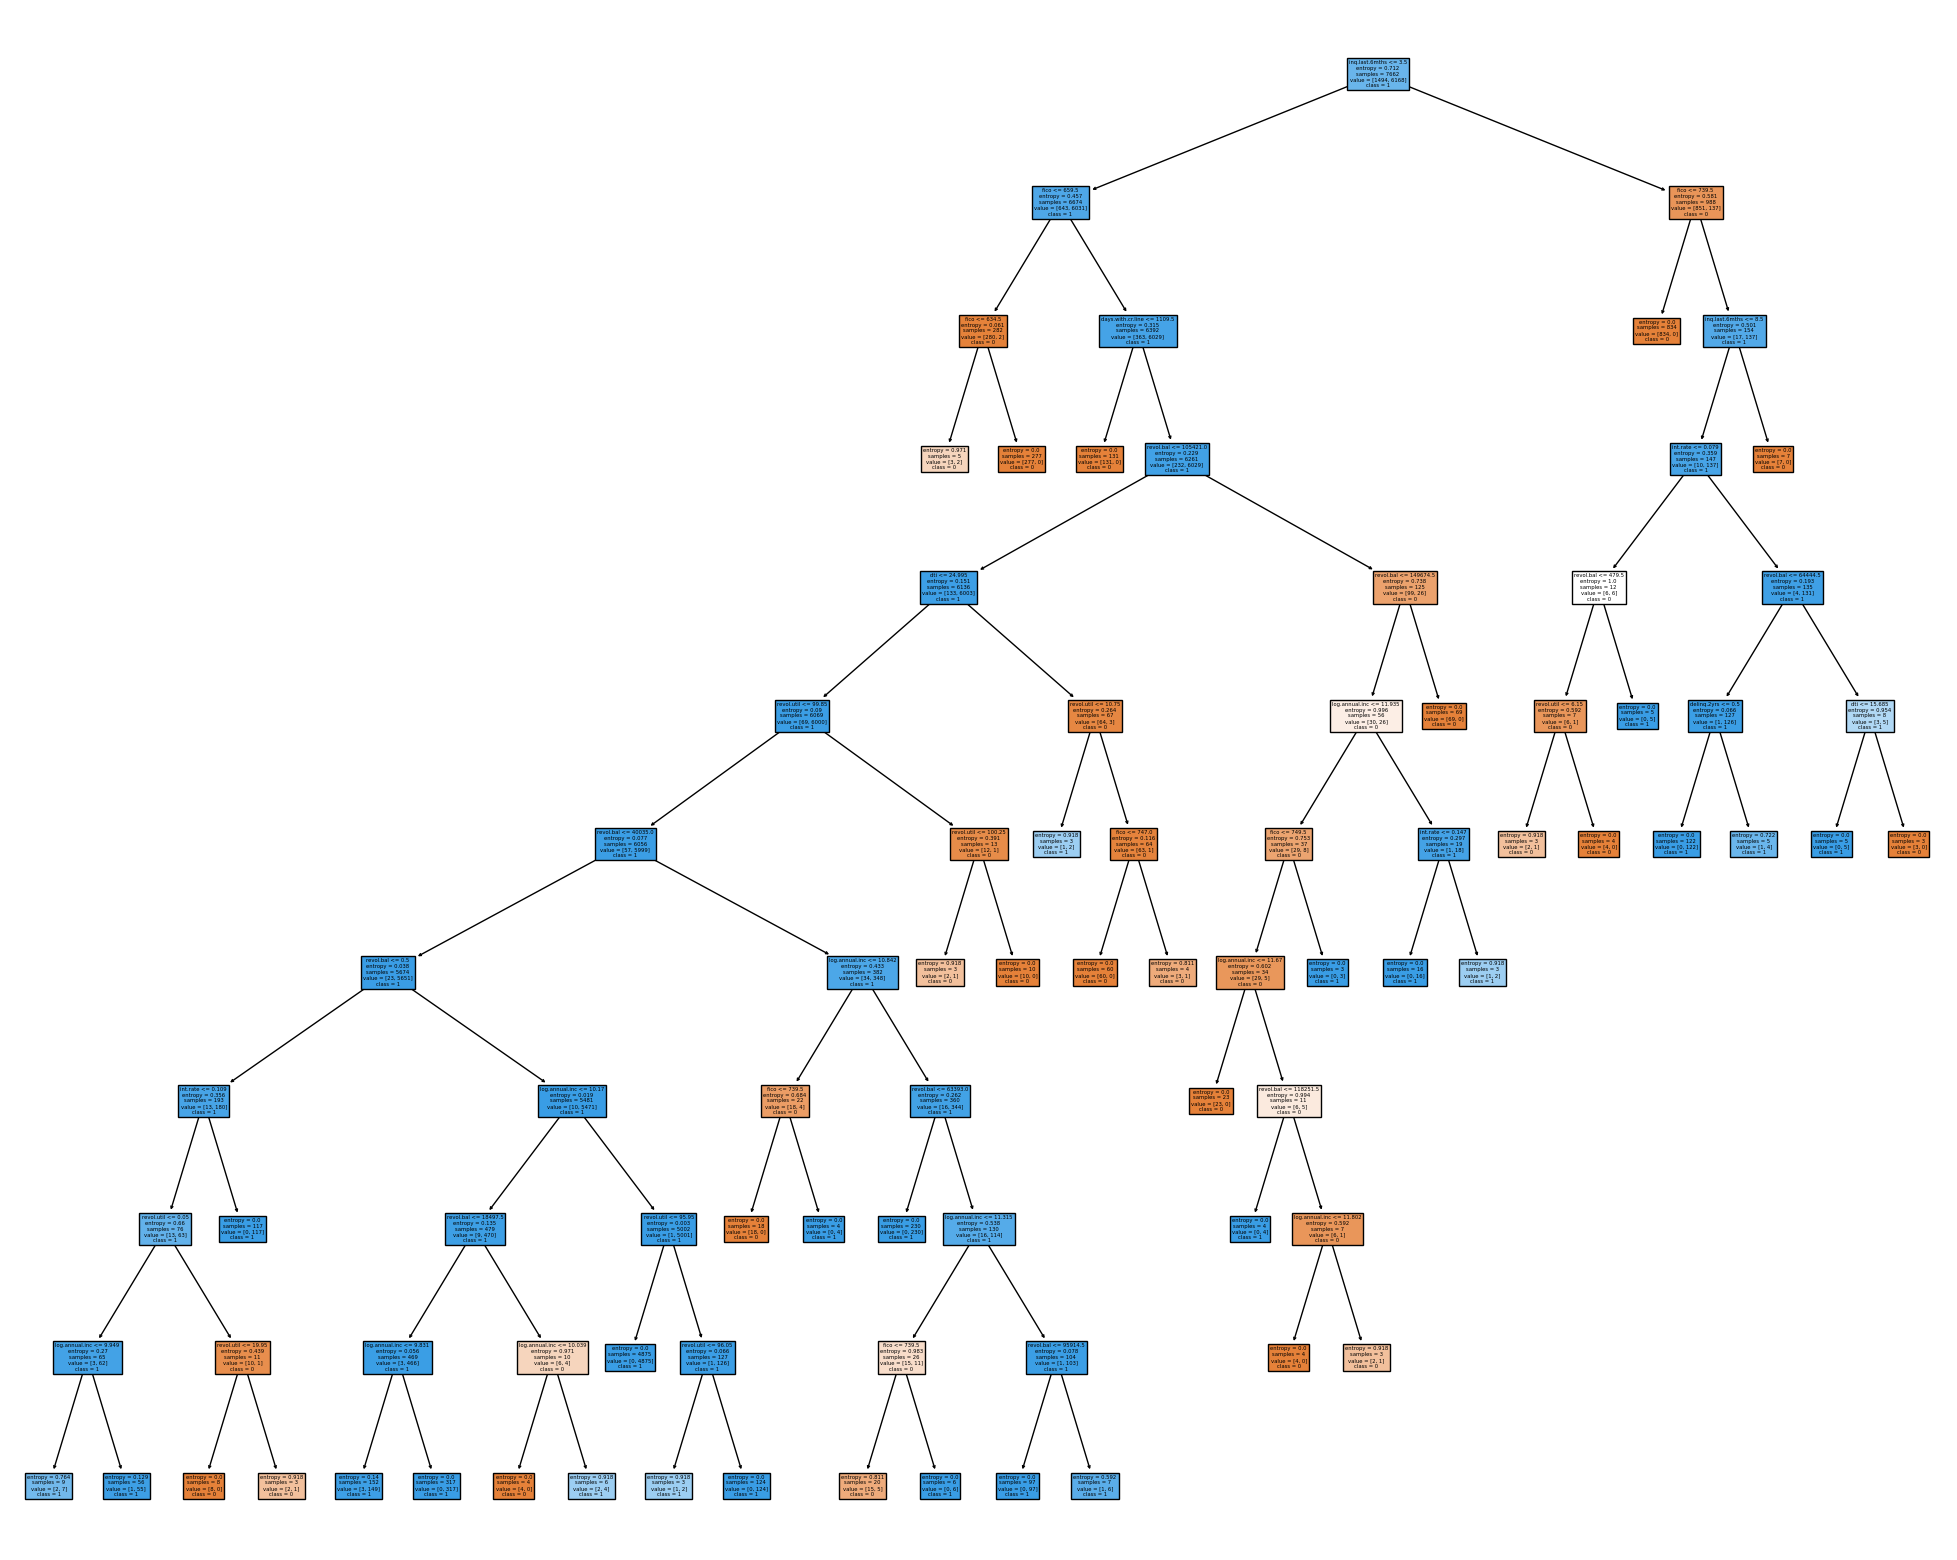

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# visualize the decision tree
fig = plt.figure(figsize=(25, 20))
_ = plot_tree(best_dtree, feature_names=X_train.columns, 
              class_names=['0', '1'], filled=True)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# create the model with no fine-tuning 
random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# evaluate the performance
print_metrics(y_test, y_pred)

Recall: 0.99676
Precision: 0.99034
F1: 0.99354
Balanced accuracy: 0.97833


In [ ]:
# evaluate the initial model performance using classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       374
           1       0.99      1.00      0.99      1542

    accuracy                           0.99      1916
   macro avg       0.99      0.98      0.98      1916
weighted avg       0.99      0.99      0.99      1916



#### Tuning the Random Forest

In [ ]:
# tune the random forest applying grid search
parameters = {'criterion': ['gini', 'entropy'],
              'n_estimators': [25, 50, 75, 100, 150, 200],
              'max_depth': [None] + list(np.arange(1, 20, 2)),
              'min_samples_split': np.arange(2, 10),
              'min_samples_leaf': np.arange(1, 6), 
              'max_features': [None, 'sqrt', 'log2']
              }

search = GridSearchCV(estimator=RandomForestClassifier(), 
                      param_grid=parameters, 
                      scoring=['f1', 'recall', 'precision'], refit='f1', 
                      cv=5, n_jobs=-1)

search.fit(X_train, y_train)

print('Best parameters (CV score=%0.3f):' % 
      search.best_score_, search.best_params_)

Best parameters (CV score=0.995): {'criterion': 'entropy', 'max_depth': 13, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
# print the best model
print(search.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=13, max_features=None,
                       n_estimators=50)


In [ ]:
# define the best model
best_forest = search.best_estimator_

best_forest.fit(X_train, y_train)
y_pred_rf = best_forest.predict(X_test)

# evaluate the model performance
print_metrics(y_test, y_pred_rf)

Recall: 0.99611
Precision: 0.99676
F1: 0.99643
Balanced accuracy: 0.99137


In [ ]:
# evaluate the model performance using classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       374
           1       1.00      1.00      1.00      1542

    accuracy                           0.99      1916
   macro avg       0.99      0.99      0.99      1916
weighted avg       0.99      0.99      0.99      1916



#### Visualize the Random Forest

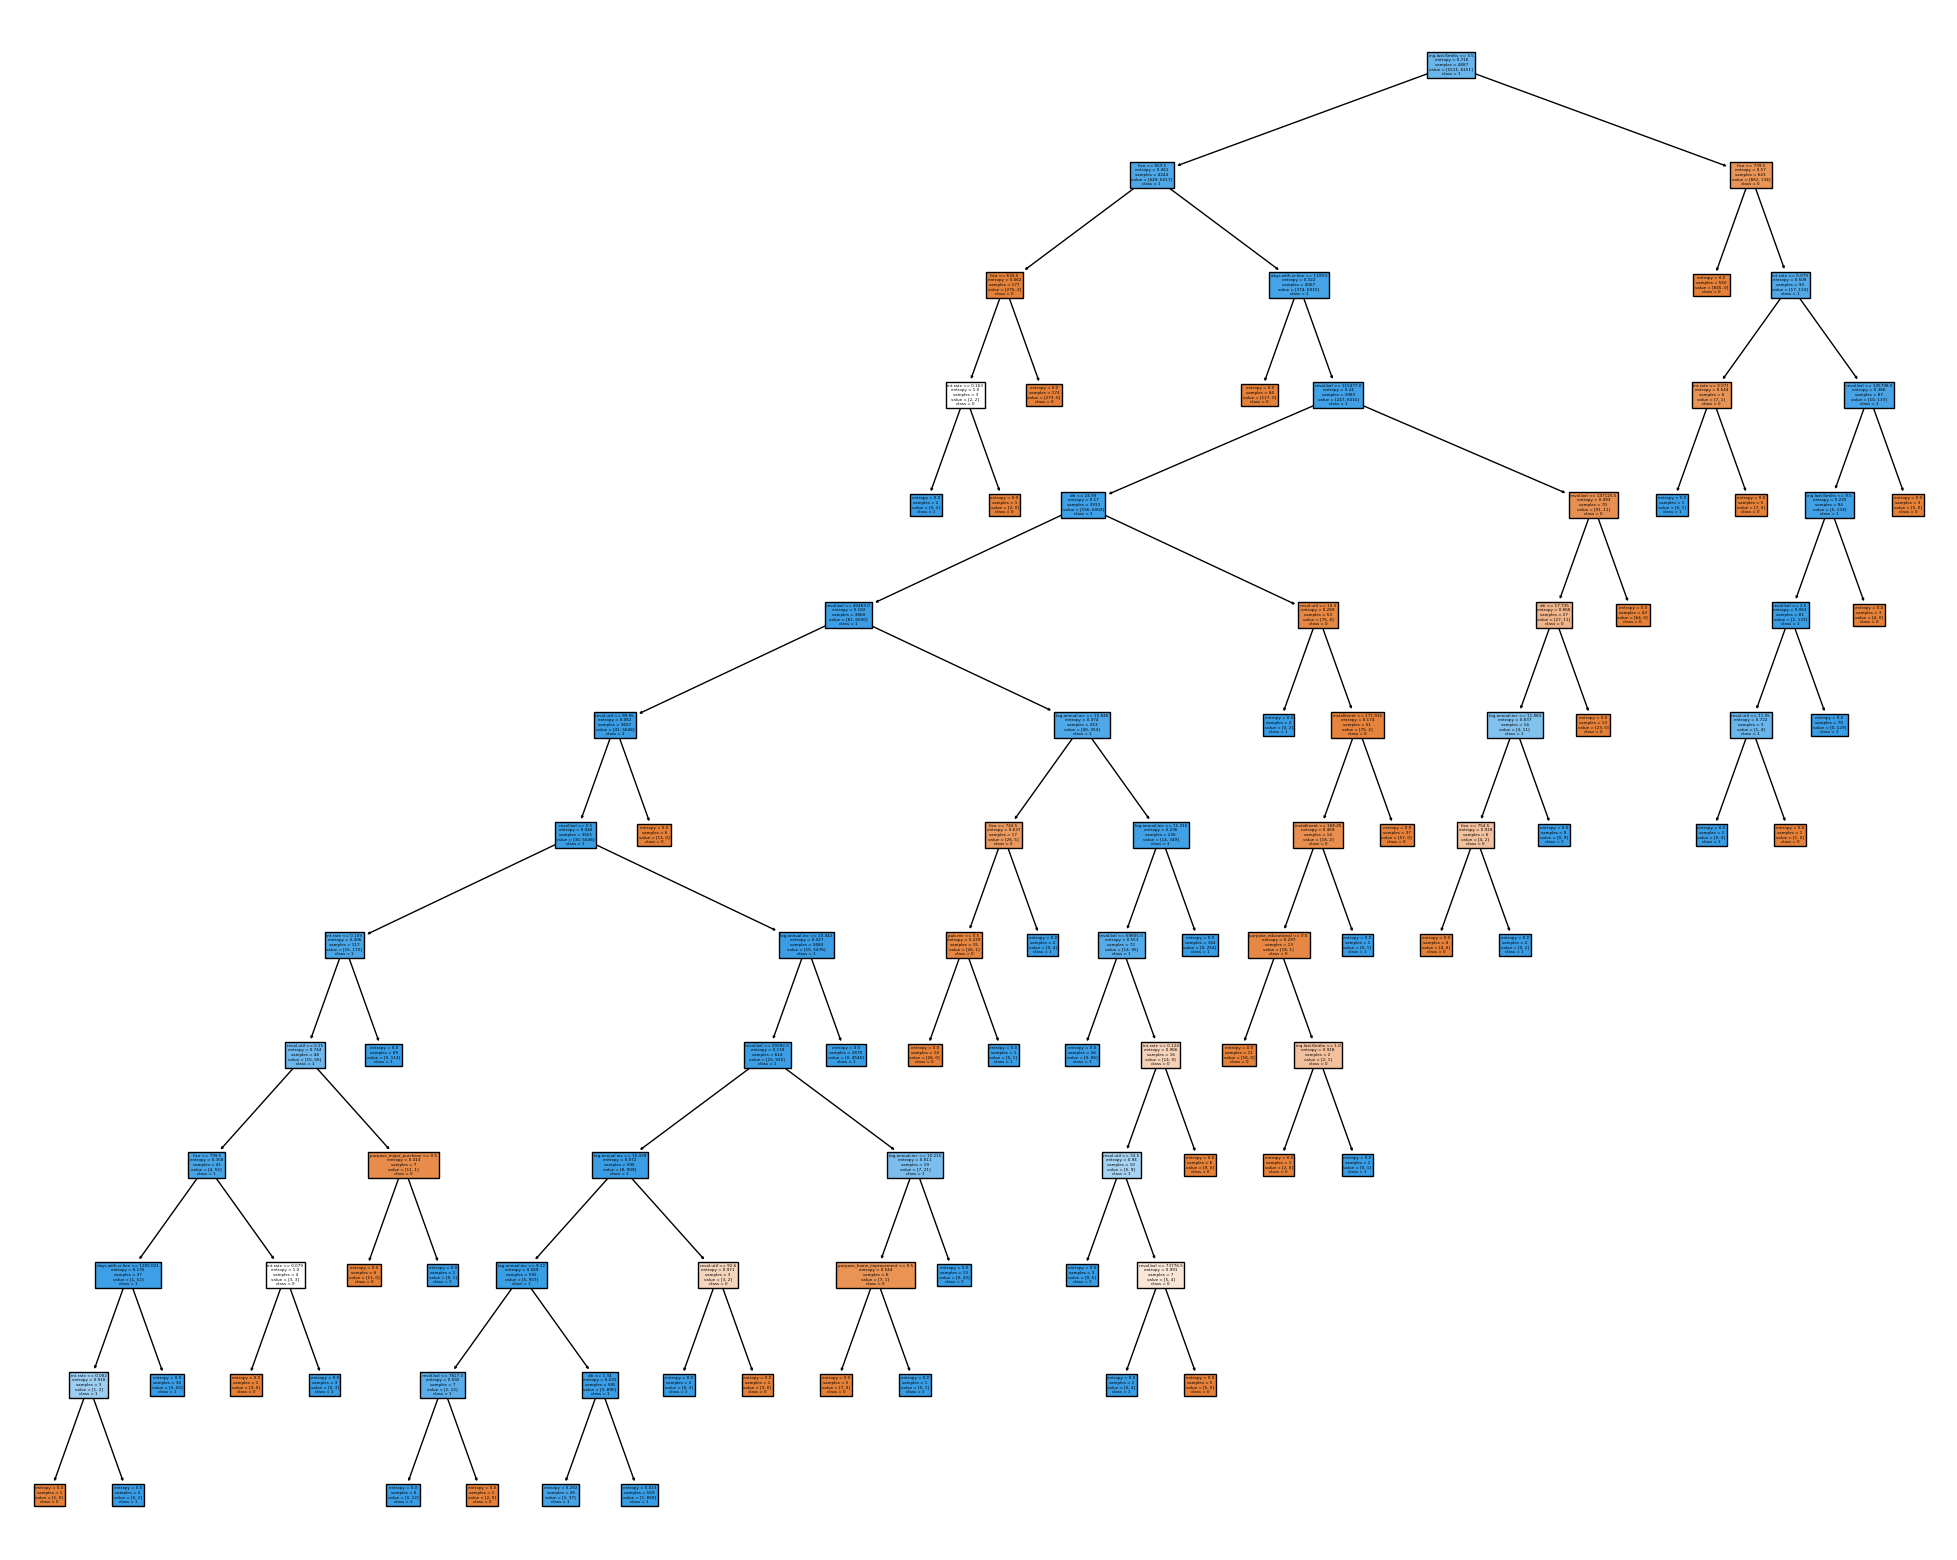

In [ ]:
# visualize one tree from the random forest
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 20))
_ = plot_tree(best_forest.estimators_[5], feature_names=X_train.columns, 
              class_names=['0', '1'], filled=True)

Comments:
1. Comparison of DT to RF in case of performance:
    - According to the obtained results after tuning the models, both decision tree and random forest perform well for the given task. However, RF is more efficient in terms of metrics such as balanced accuracy score, precision and f1 score compared to DT. Specifically, balanced accuracy score for DT is `0.98805`, while for RF is `0.99137`. It can be concluded that RF performs slightly better than DT, as RF provides more accurate predictions by combining the multiple trees (50 in this case) together.

2. Ensemble learning, its pros and cons:
    - Ensemble learning is a technique that allows the combination of multiple models to form a single, more accurate model.
    - Advantages: 
        1. Ensemble learning provides a higher predictive accuracy compared to a single model. 
        2. Ensemble learning can reduce the variance or bias due to the combination of multiple models. 
        3. It can help prevent overfitting by combining multiple models trained on different subsets of data.
    - Disdvantages:
        1. Low interpretability of the resulting model. For example, when dealing with a single decision tree, it is possible to visualize and interpret it, but in ensemble learning, this becomes a challenging task, since predictions are made based on the combined output of several models.
        2. Ensemble learning can increase the complexity of the model and make it harder to interpret and explain.
        3. Ensemble learning can be computationally expensive, particularly if a large number of models are combined together.
